**📈 SALES PREDICTION **

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

📥  Load the Dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving advertising.csv to advertising.csv


In [3]:
data = pd.read_csv('advertising.csv', encoding='ISO-8859-1', low_memory=False)

📋 Basic Information

In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


🔍  Exploratory Data Analysis (EDA)

📊 Data Visualization

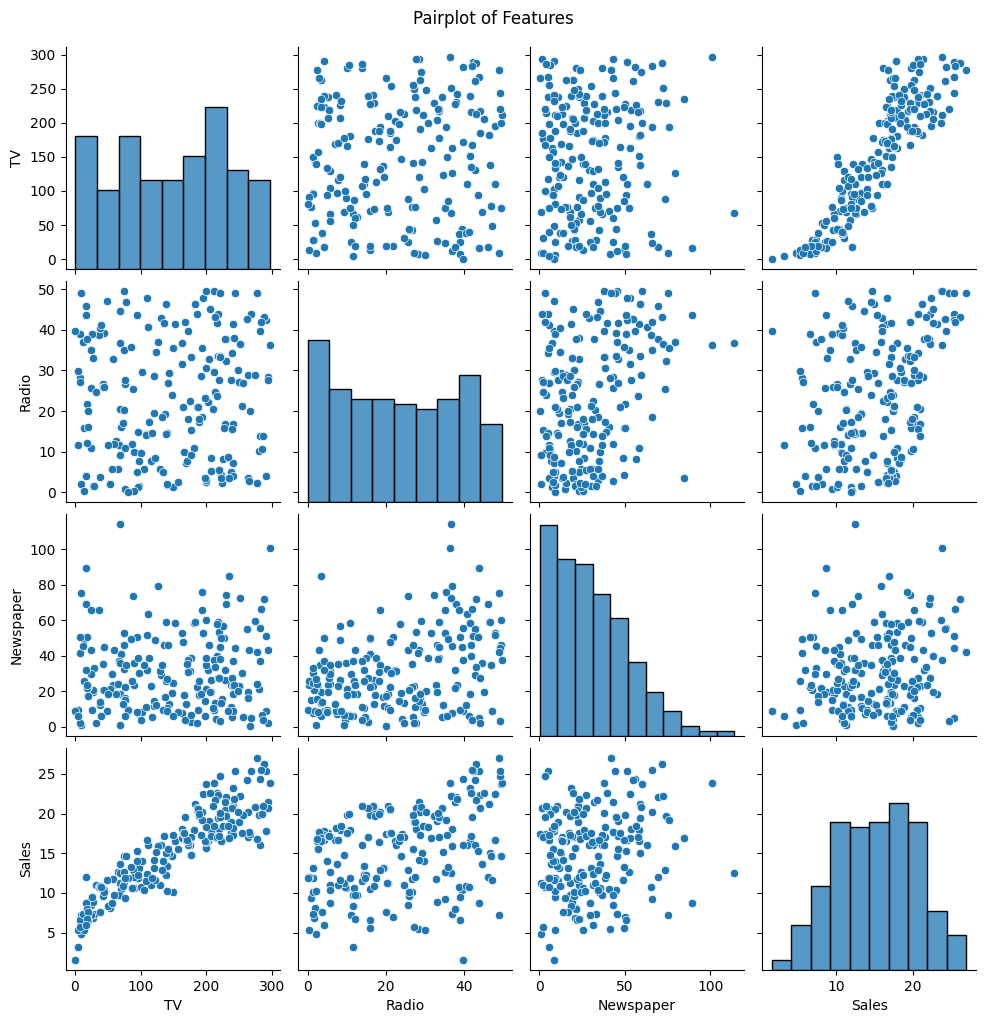

In [8]:
#Pairplot
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

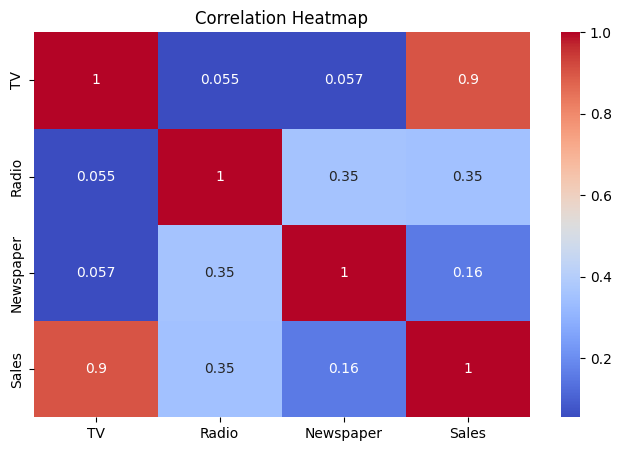

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

🧹 Data Preprocessing

In [10]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


🧠  Model Building

In [13]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']                       # Target


In [14]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

📈 Model Evaluation

In [18]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [19]:
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"\nMean Squared Error: {mse:.2f}")

R² Score: 0.91
Mean Absolute Error (MAE): 1.27

Mean Squared Error: 2.91


In [20]:
print("\nModel Coefficients:")
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)


Model Coefficients:
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [21]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(results.head())


Actual vs Predicted:
     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719


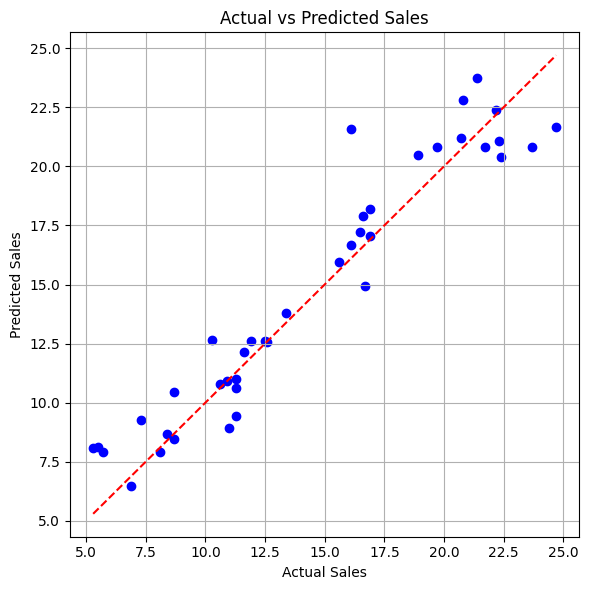

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.grid(True)
plt.tight_layout()
plt.show()